In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats.mstats import winsorize
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Pet_project_logistic_Regression/fetal_health.csv', sep =',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


**Baseline Value** (Базовое значение): Средняя частота сердцебиения плода за определенный период.

**Accelerations** (Ускорения): Временные увеличения частоты сердцебиения плода, что может быть признаком хорошего здоровья и реактивности плода.

**Fetal Movement** (Движение плода): Детектирование движений плода, которое может влиять на его сердцебиение.

**Uterine Contractions** (Сокращения матки): Сокращения матки во время беременности, которые могут влиять на частоту сердцебиения плода.

**Light Decelerations** (Легкие замедления): Небольшие и кратковременные снижения частоты сердцебиения плода.

**Severe Decelerations** (Сильные замедления): Значительные и потенциально опасные снижения частоты сердцебиения плода.

**Prolongued Decelerations** (Продолжительные замедления): Длительные снижения частоты сердцебиения плода.

**Abnormal Short Term Variability** (Аномальная кратковременная вариабельность): Изменчивость частоты сердцебиения плода в короткие промежутки времени, указывающая на возможные проблемы.

**Mean Value of Short Term Variability** (Среднее значение кратковременной вариабельности): Среднее изменение частоты сердцебиения плода в короткий период времени.

**Percentage of Time with Abnormal Long Term Variability** (Процент времени с аномальной долговременной вариабельностью): Доля времени, в течение которой наблюдается аномальная изменчивость частоты сердцебиения плода на длительные промежутки.

**Mean Value of Long Term Variability** (Среднее значение долговременной вариабельности): Среднее изменение частоты сердцебиения плода за длительный период.

**Histogram Width** (Ширина гистограммы): Ширина распределения значений частоты сердцебиения плода.

**Histogram Min** (Минимум гистограммы): Минимальное значение в распределении частоты сердцебиения плода.

**Histogram Max** (Максимум гистограммы): Максимальное значение в распределении частоты сердцебиения плода.

**Histogram Number of Peaks** (Количество пиков гистограммы): Количество пиков в распределении частоты сердцебиения плода.

**Histogram Number of Zeroes** (Количество нулей гистограммы): Количество раз, когда частота сердцебиения плода была равна нулю.

**Histogram Mode** (Мода гистограммы): Наиболее часто встречающееся значение частоты сердцебиения плода.

**Histogram Mean** (Среднее значение гистограммы): Среднее значения частоты сердцебиения плода

3 classes:

Normal

Suspect

Pathological

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.fetal_health.value_counts(normalize = False)

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

Unbalanced classes

In [ ]:
for col in df.columns:
  print('Numbers of missing values in %s = %d'%(col, df.columns.isna().sum()))

Numbers of missing values in baseline value = 0
Numbers of missing values in accelerations = 0
Numbers of missing values in fetal_movement = 0
Numbers of missing values in uterine_contractions = 0
Numbers of missing values in light_decelerations = 0
Numbers of missing values in severe_decelerations = 0
Numbers of missing values in prolongued_decelerations = 0
Numbers of missing values in abnormal_short_term_variability = 0
Numbers of missing values in mean_value_of_short_term_variability = 0
Numbers of missing values in percentage_of_time_with_abnormal_long_term_variability = 0
Numbers of missing values in mean_value_of_long_term_variability = 0
Numbers of missing values in histogram_width = 0
Numbers of missing values in histogram_min = 0
Numbers of missing values in histogram_max = 0
Numbers of missing values in histogram_number_of_peaks = 0
Numbers of missing values in histogram_number_of_zeroes = 0
Numbers of missing values in histogram_mode = 0
Numbers of missing values in histogr

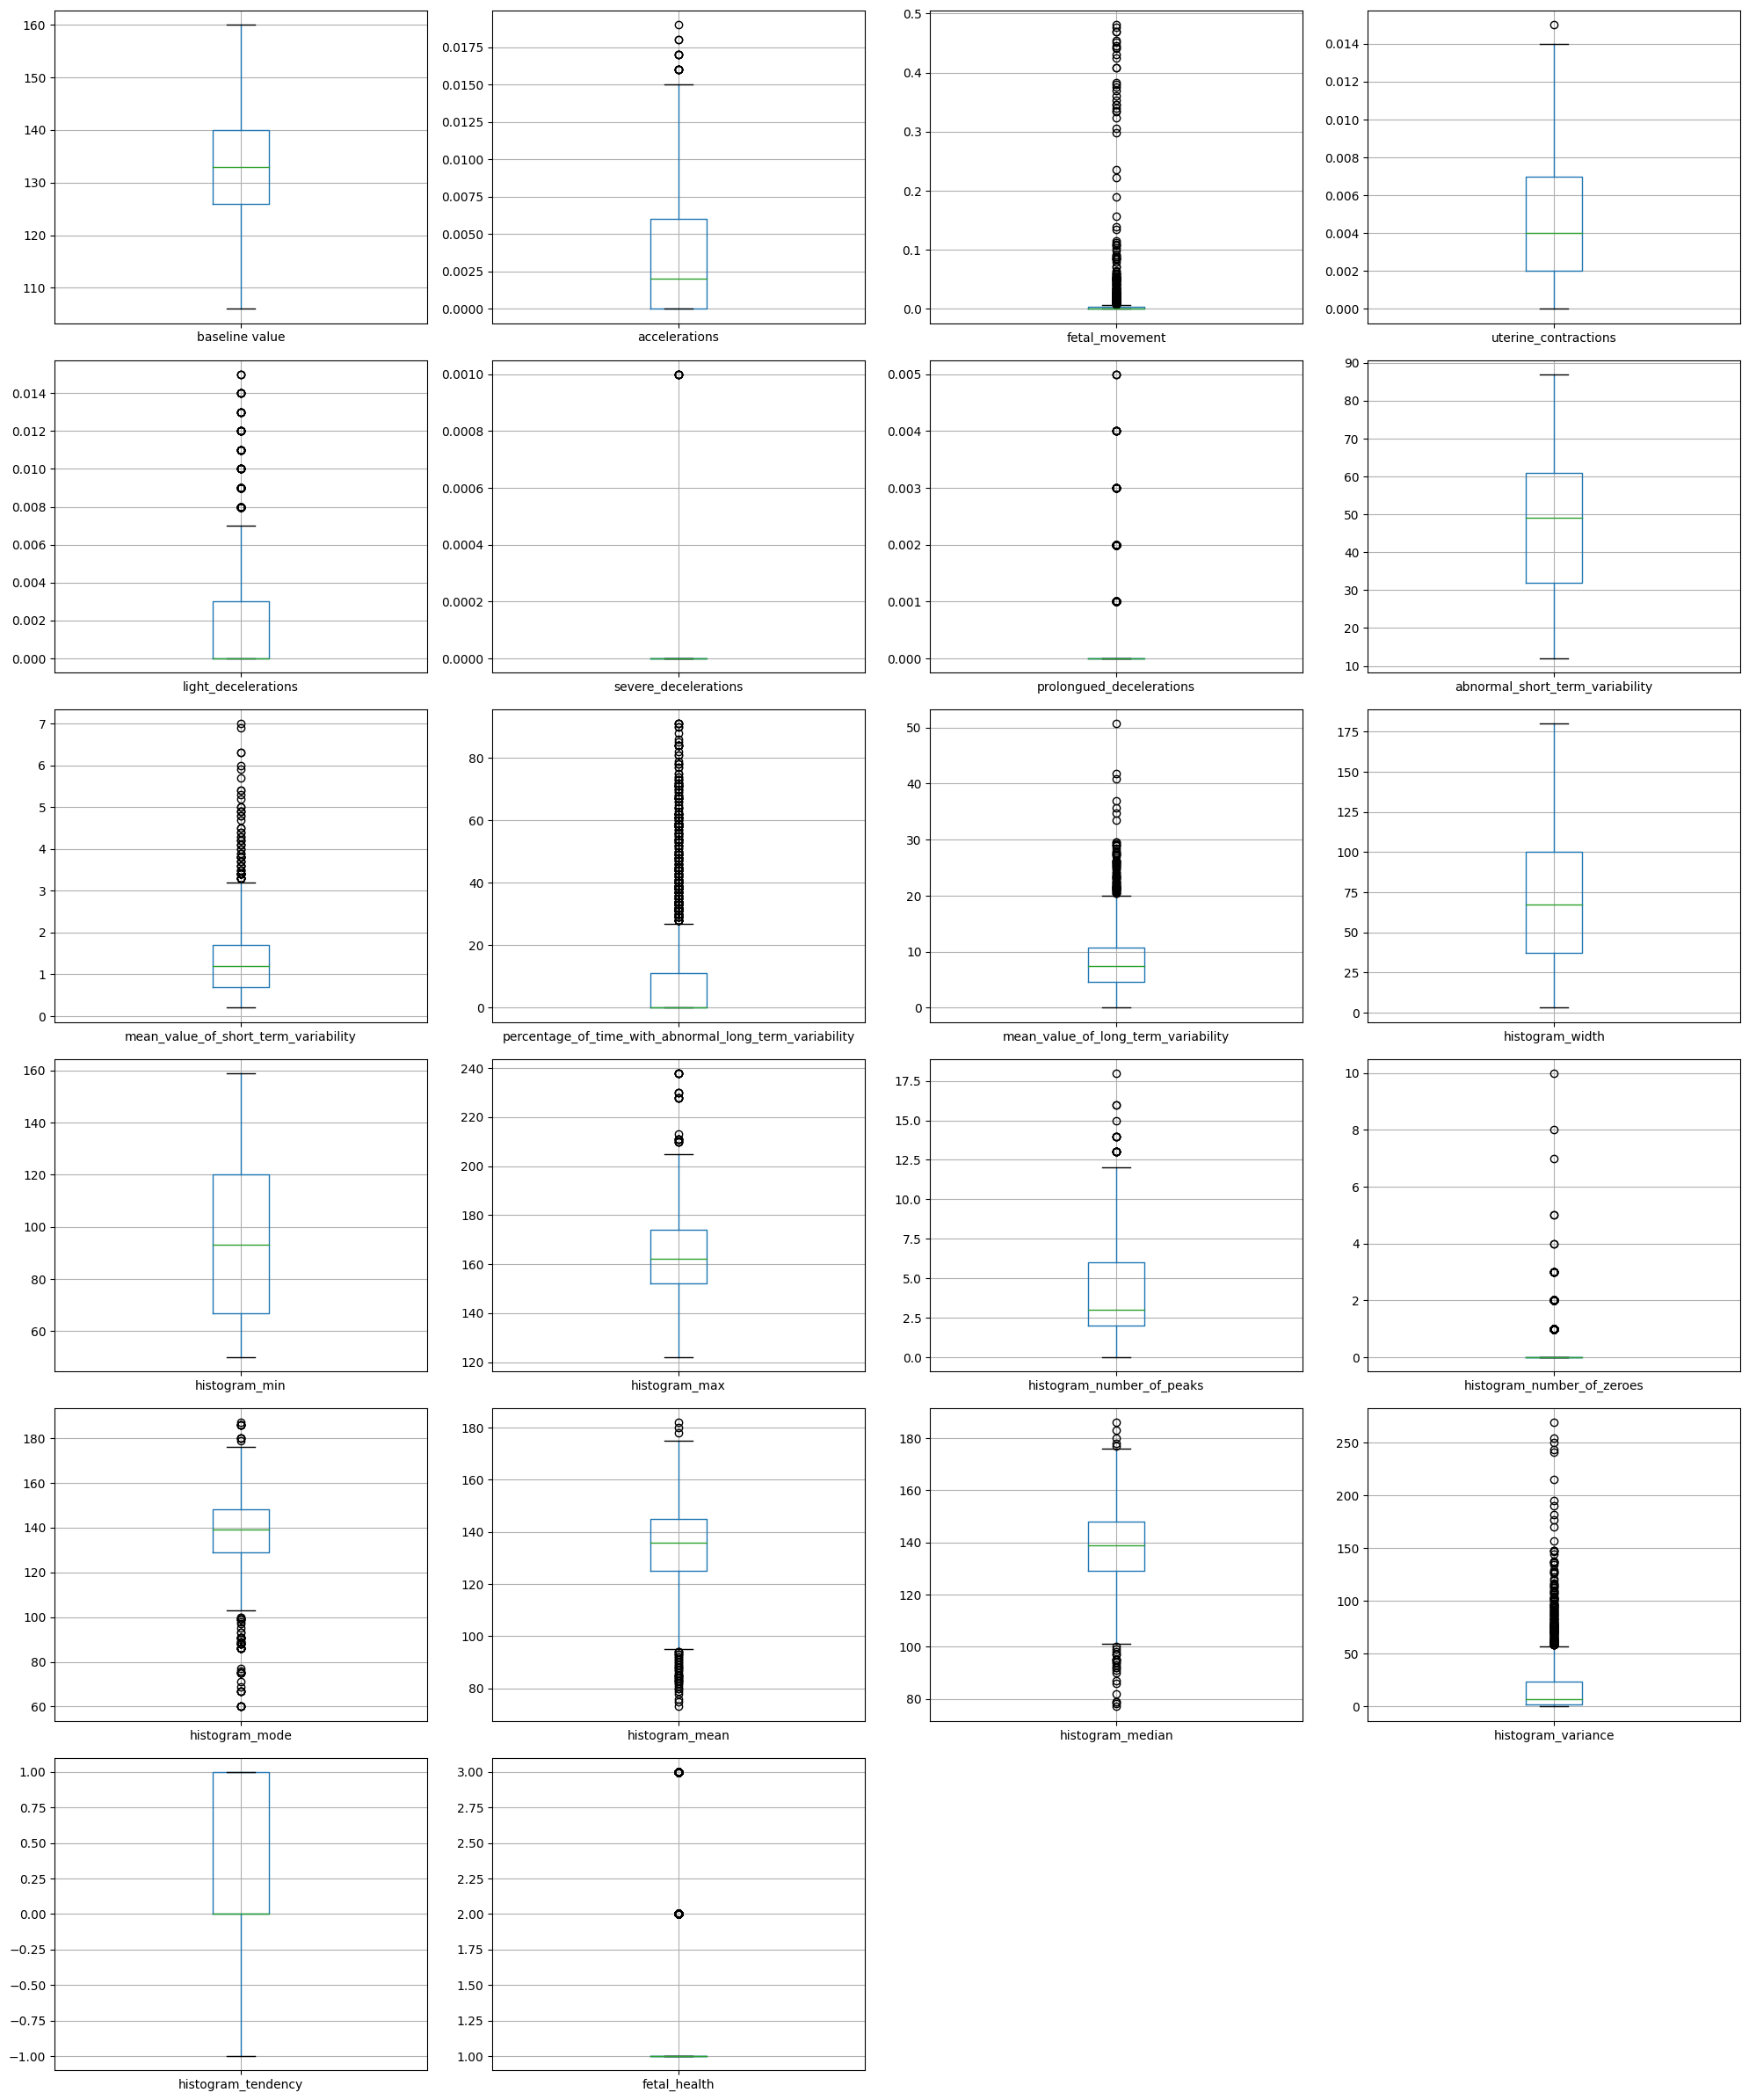

In [ ]:
cols_per_row = 4
num_rows = len(df.columns) // cols_per_row + (1 if len(df.columns) % cols_per_row else 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))

for i, col in enumerate(df.columns):
    row = i // cols_per_row
    col_idx = i % cols_per_row
    df.boxplot(column=col, ax=axes[row, col_idx])

if len(df.columns) % cols_per_row:
    for j in range(len(df.columns) % cols_per_row, cols_per_row):
        fig.delaxes(axes[num_rows-1, j])

plt.tight_layout()
plt.show()

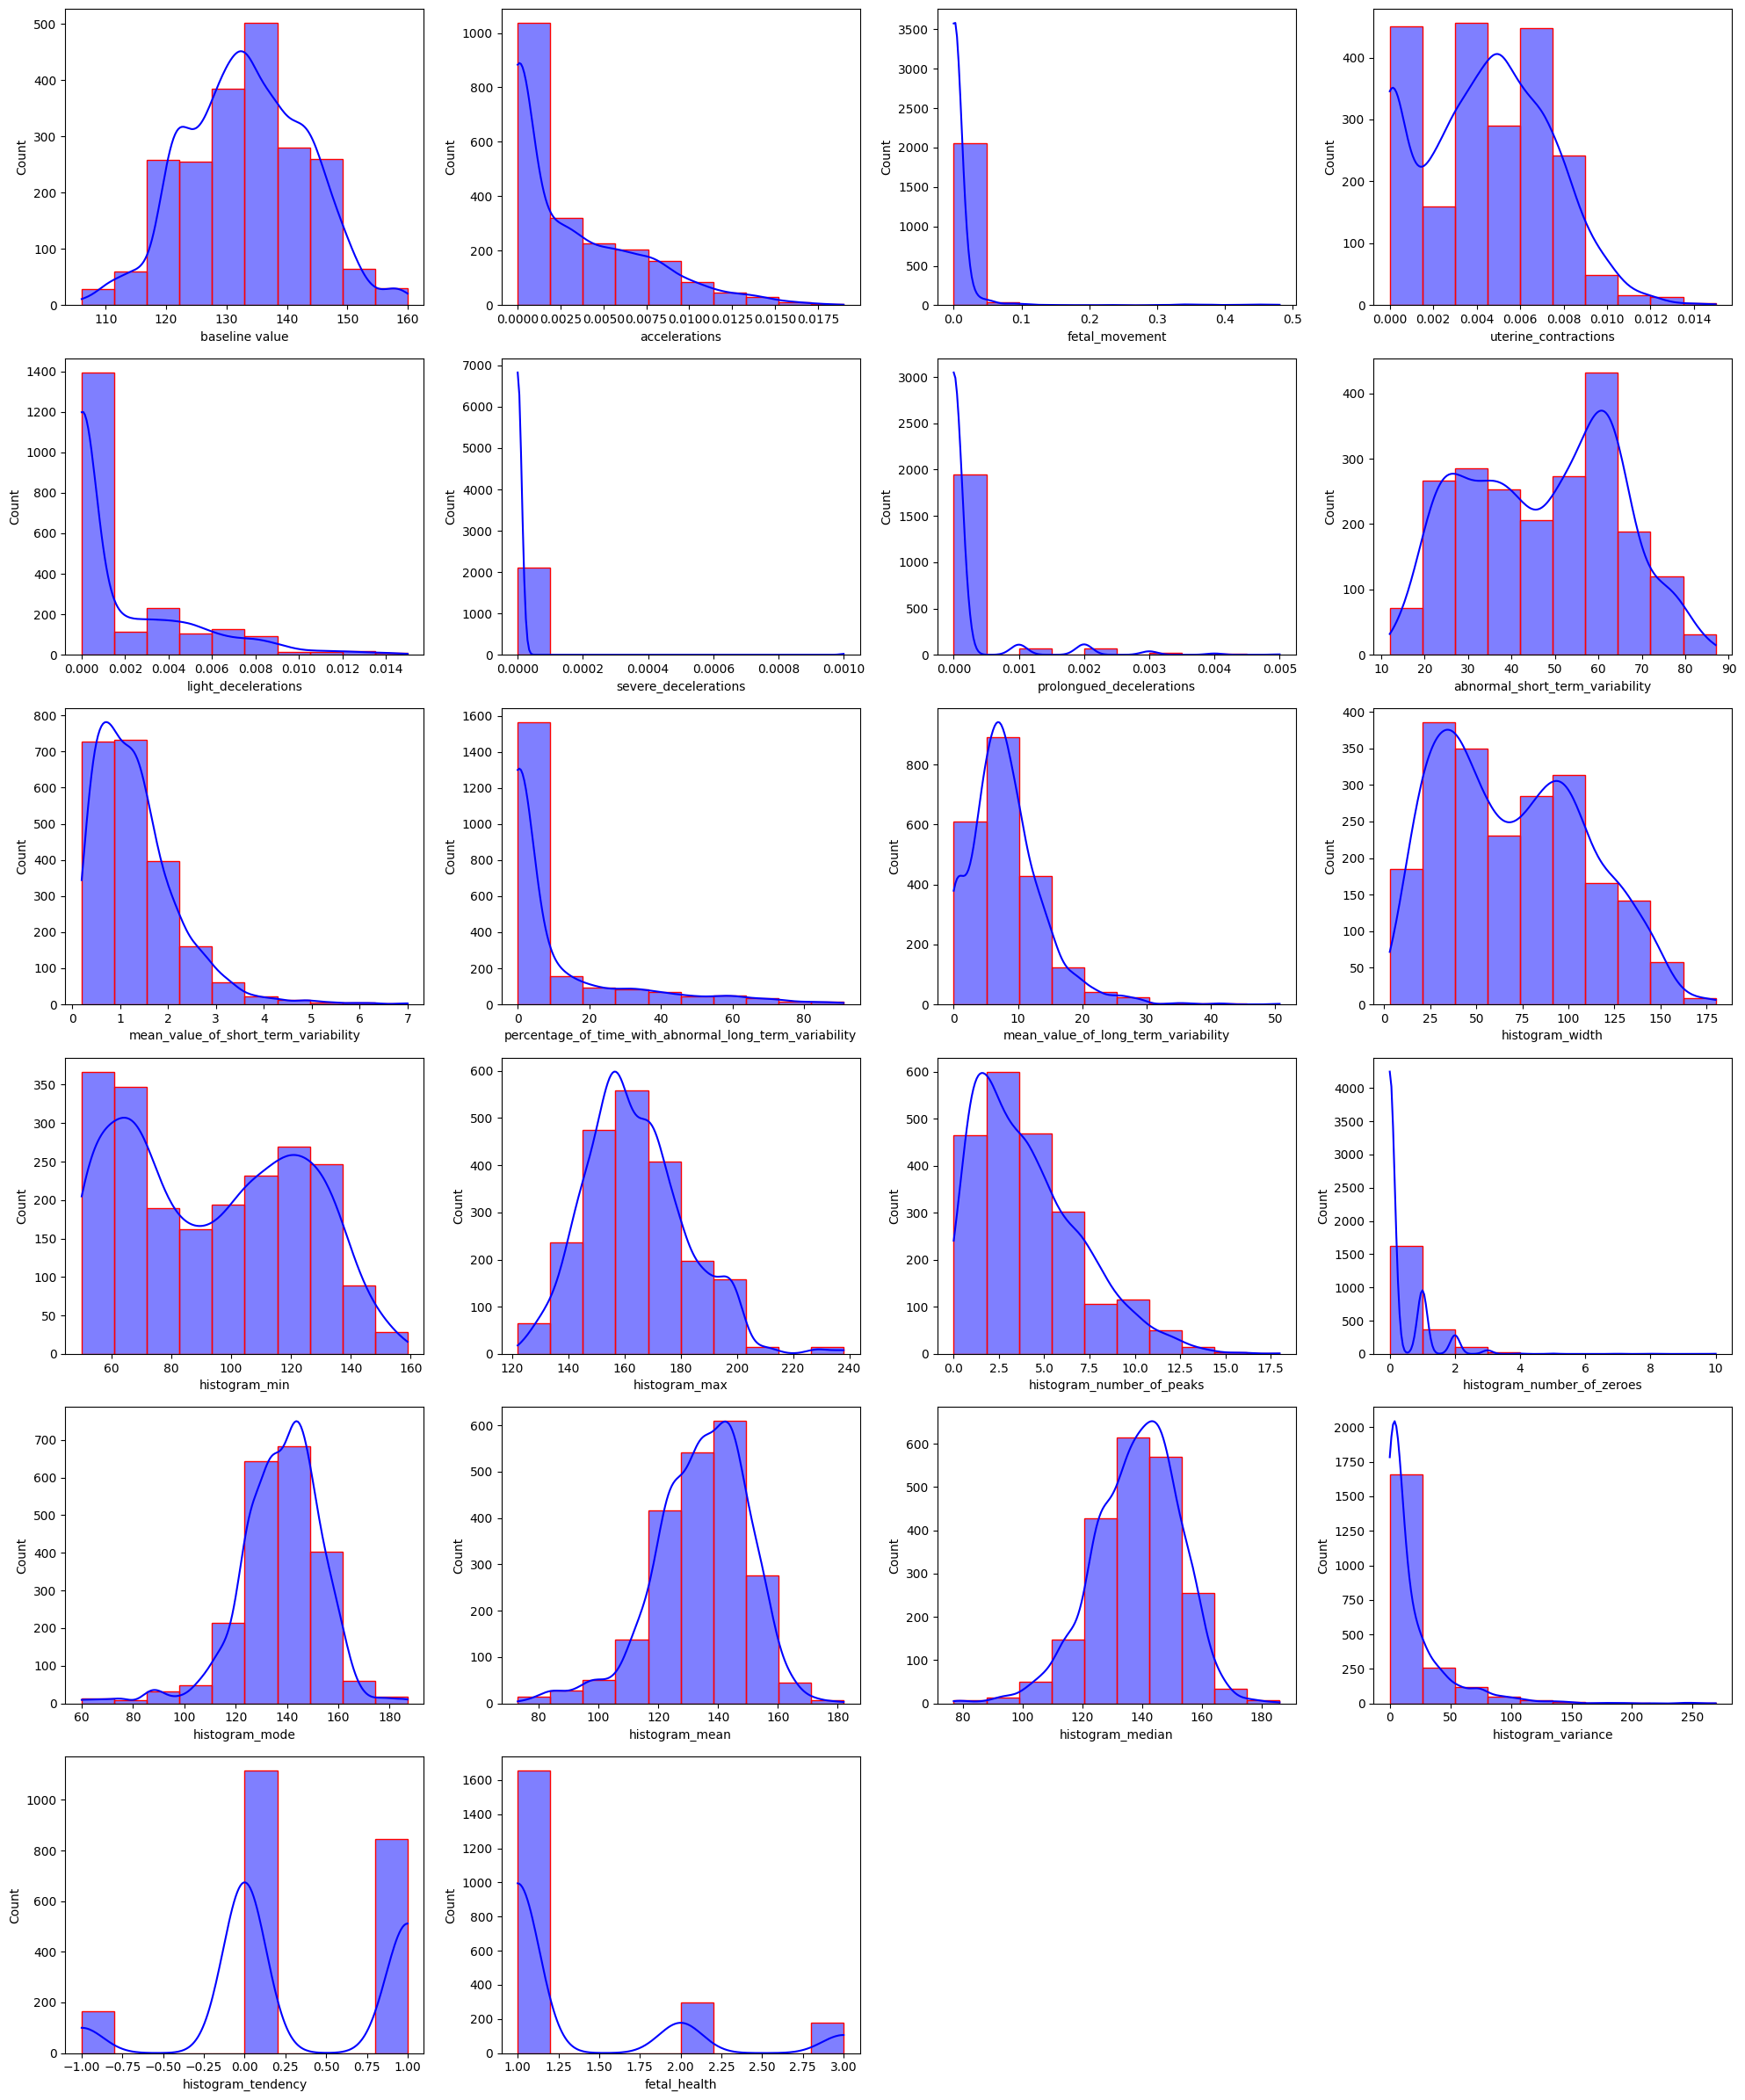

In [ ]:
def histograms():
  cols_per_row = 4
  num_rows = len(df.columns) // cols_per_row + (1 if len(df.columns) % cols_per_row else 0)

  fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))

  for i, col in enumerate(df.columns):
      row = i // cols_per_row
      col_idx = i % cols_per_row
      sns.histplot(data = df, x = col, bins=10, kde=True, color='blue', edgecolor='red', ax=axes[row, col_idx])

  if len(df.columns) % cols_per_row:
      for j in range(len(df.columns) % cols_per_row, cols_per_row):
          fig.delaxes(axes[num_rows-1, j])

  plt.tight_layout()
  return plt.show()

histograms()

In [ ]:
for col in df.columns:
  lower_bound, upper_bound = np.percentile(df[col], [5, 95])
  df[col] = winsorize(df[col], limits = (0.05, 0.05))

In [ ]:
def box_plots():
  cols_per_row = 4
  num_rows = len(df.columns) // cols_per_row + (1 if len(df.columns) % cols_per_row else 0)

  fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))

  for i, col in enumerate(df.columns):
      row = i // cols_per_row
      col_idx = i % cols_per_row
      df.boxplot(column=col, ax=axes[row, col_idx])

  if len(df.columns) % cols_per_row:
      for j in range(len(df.columns) % cols_per_row, cols_per_row):
          fig.delaxes(axes[num_rows-1, j])

  plt.tight_layout()
  return plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
X = df[['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]
y = df['fetal_health']

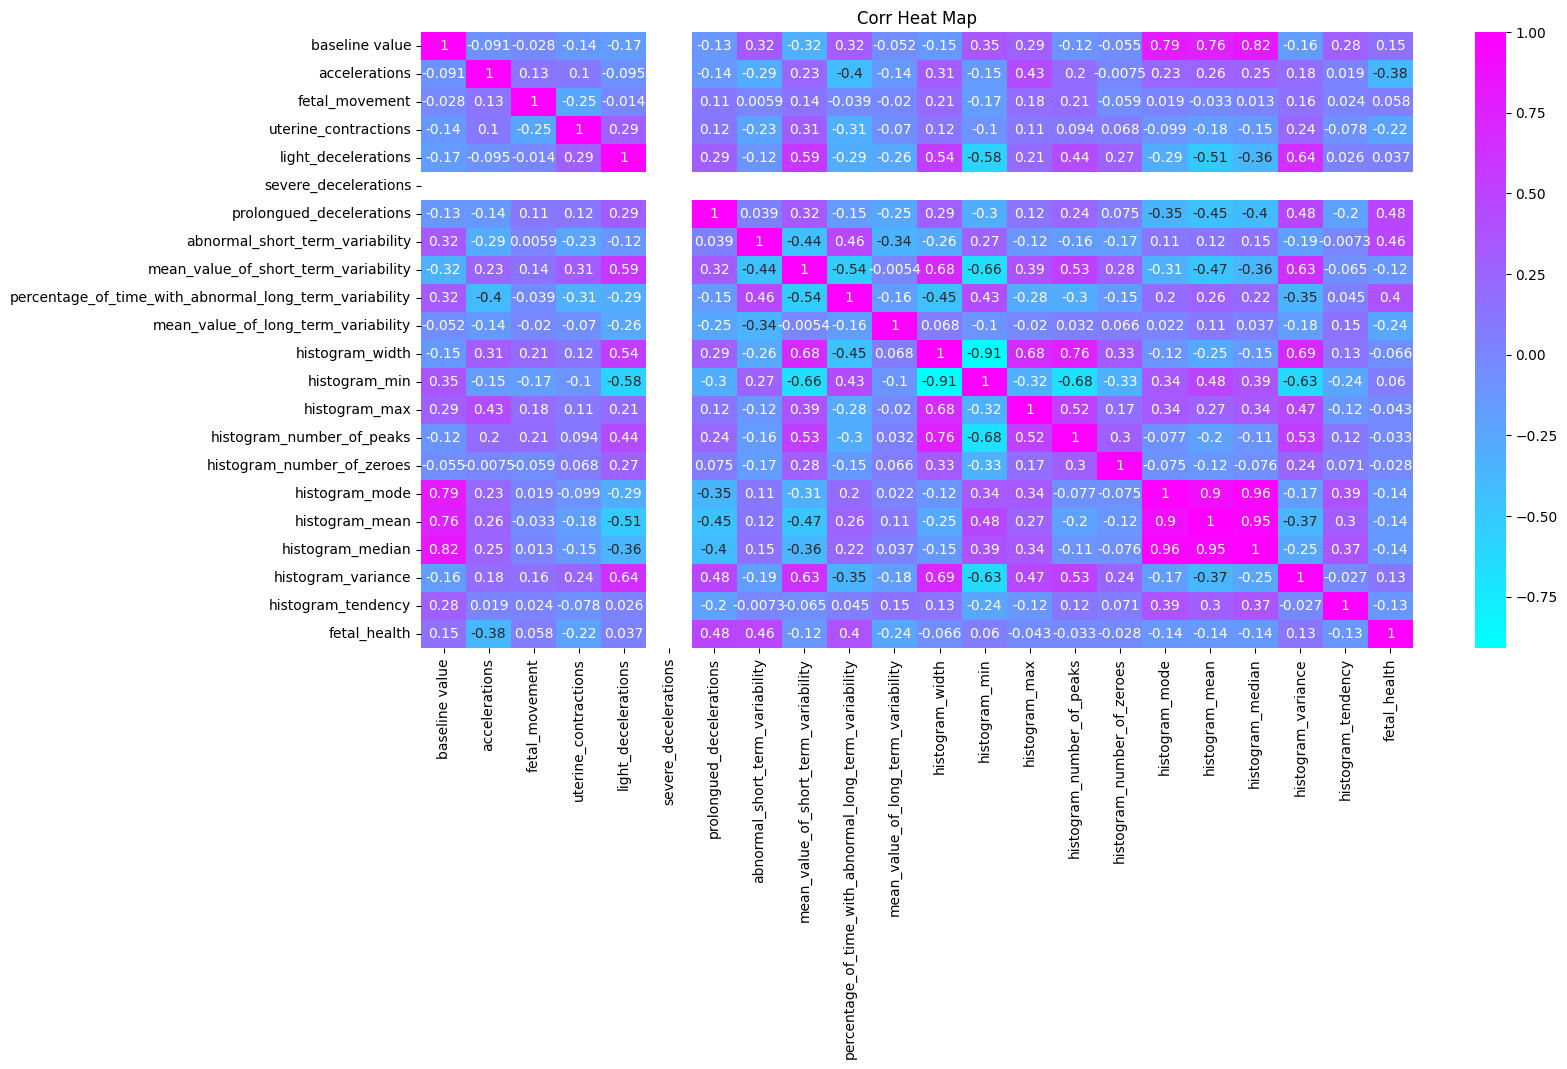

In [ ]:
corr = df.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr, annot = True, cmap = 'cool')
plt.title('Corr Heat Map')
plt.show()

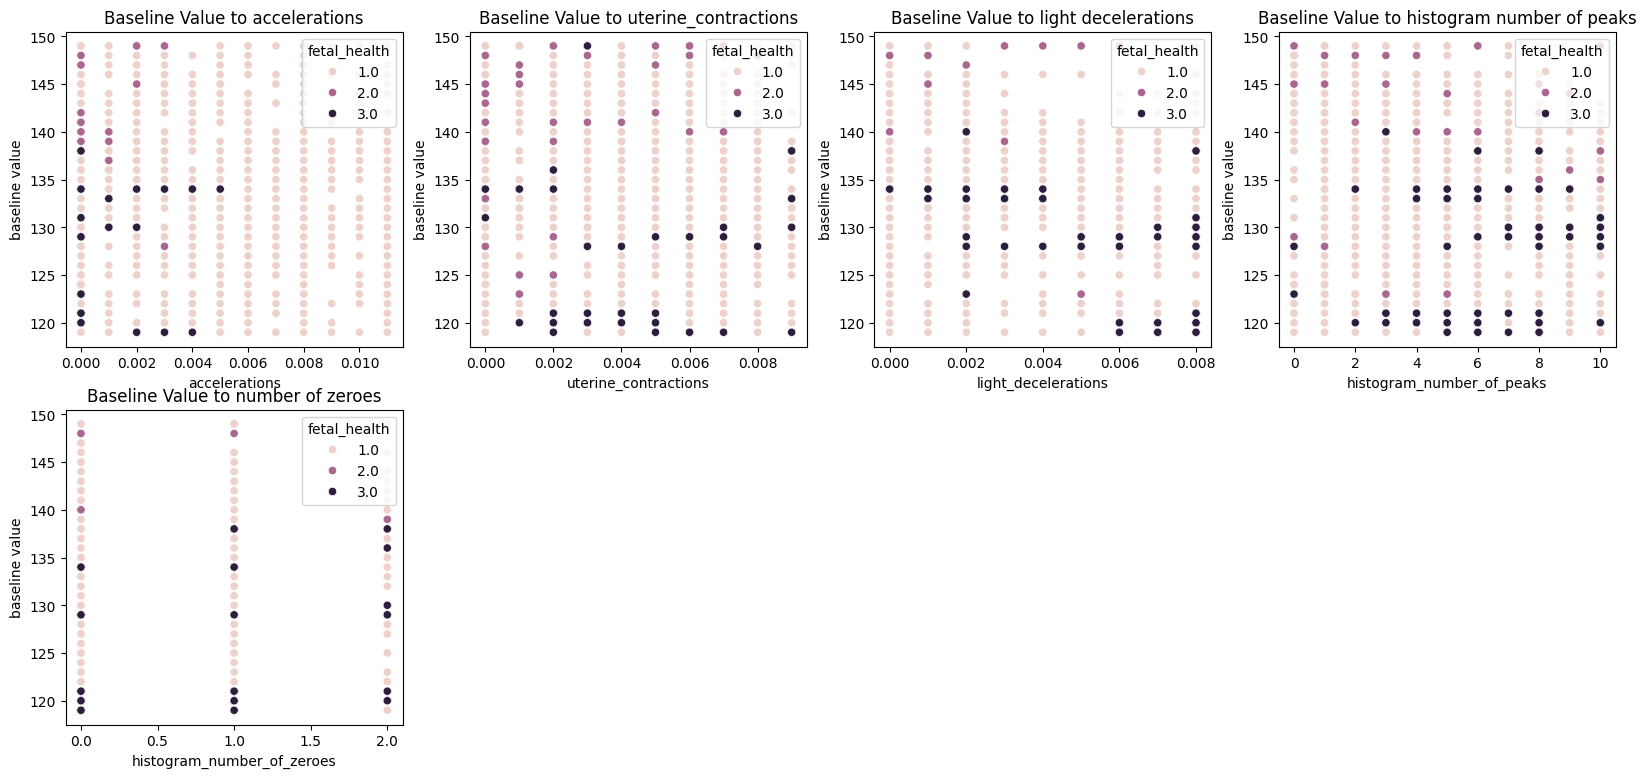

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 9))
sns.scatterplot(data = df, x = 'accelerations', y = 'baseline value', hue = 'fetal_health', ax = axs[0,0])
axs[0, 0].set_title('Baseline Value to accelerations')
sns.scatterplot(data = df, x = 'uterine_contractions', y = 'baseline value', hue = 'fetal_health', ax = axs[0,1])
axs[0, 1].set_title('Baseline Value to uterine_contractions')
sns.scatterplot(data = df, x = 'light_decelerations', y = 'baseline value', hue = 'fetal_health', ax = axs[0,2])
axs[0, 2].set_title('Baseline Value to light decelerations')
sns.scatterplot(data = df, x = 'histogram_number_of_peaks', y = 'baseline value', hue = 'fetal_health', ax = axs[0,3])
axs[0, 3].set_title('Baseline Value to histogram number of peaks')
sns.scatterplot(data = df, x = 'histogram_number_of_zeroes', y = 'baseline value', hue = 'fetal_health', ax = axs[1,0])
axs[1, 0].set_title('Baseline Value to number of zeroes')
fig.delaxes(axs[1,1])
fig.delaxes(axs[1,2])
fig.delaxes(axs[1,3])

Based on the scatterplot, we can conclude that pathological conditions (according to the parameters of heart rate and fetal movement) are most often observed when the heart rate is below 135. Also, analyzing the parameters (uterine contraction and heart rate), we see that with certain uterine contractions, a pathological fetus is also most often observed when the heart rate is below 135. Similarly, we can conduct an analysis for each parameter to identify at which values we determine fetal pathology. However, this requires a team and strong knowledge in the medical field, as my domain knowledge in medicine is limited, I can only make statistical assumptions. For the same reason, we will simply apply winsorization to outliers; in a real case (especially in medicine), we need to conduct a detailed analysis and determine how to handle outliers.

Also, without applying domain knowledge in medicine and relying solely on statistics, we can analyze two parameters that correlate with each other, giving us more information for analytics.

In [ ]:
to_change = ['fetal_movement', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_variance']
for feature in to_change:
  df[feature] = winsorize(df[feature], limits = [0.01, 0.99])

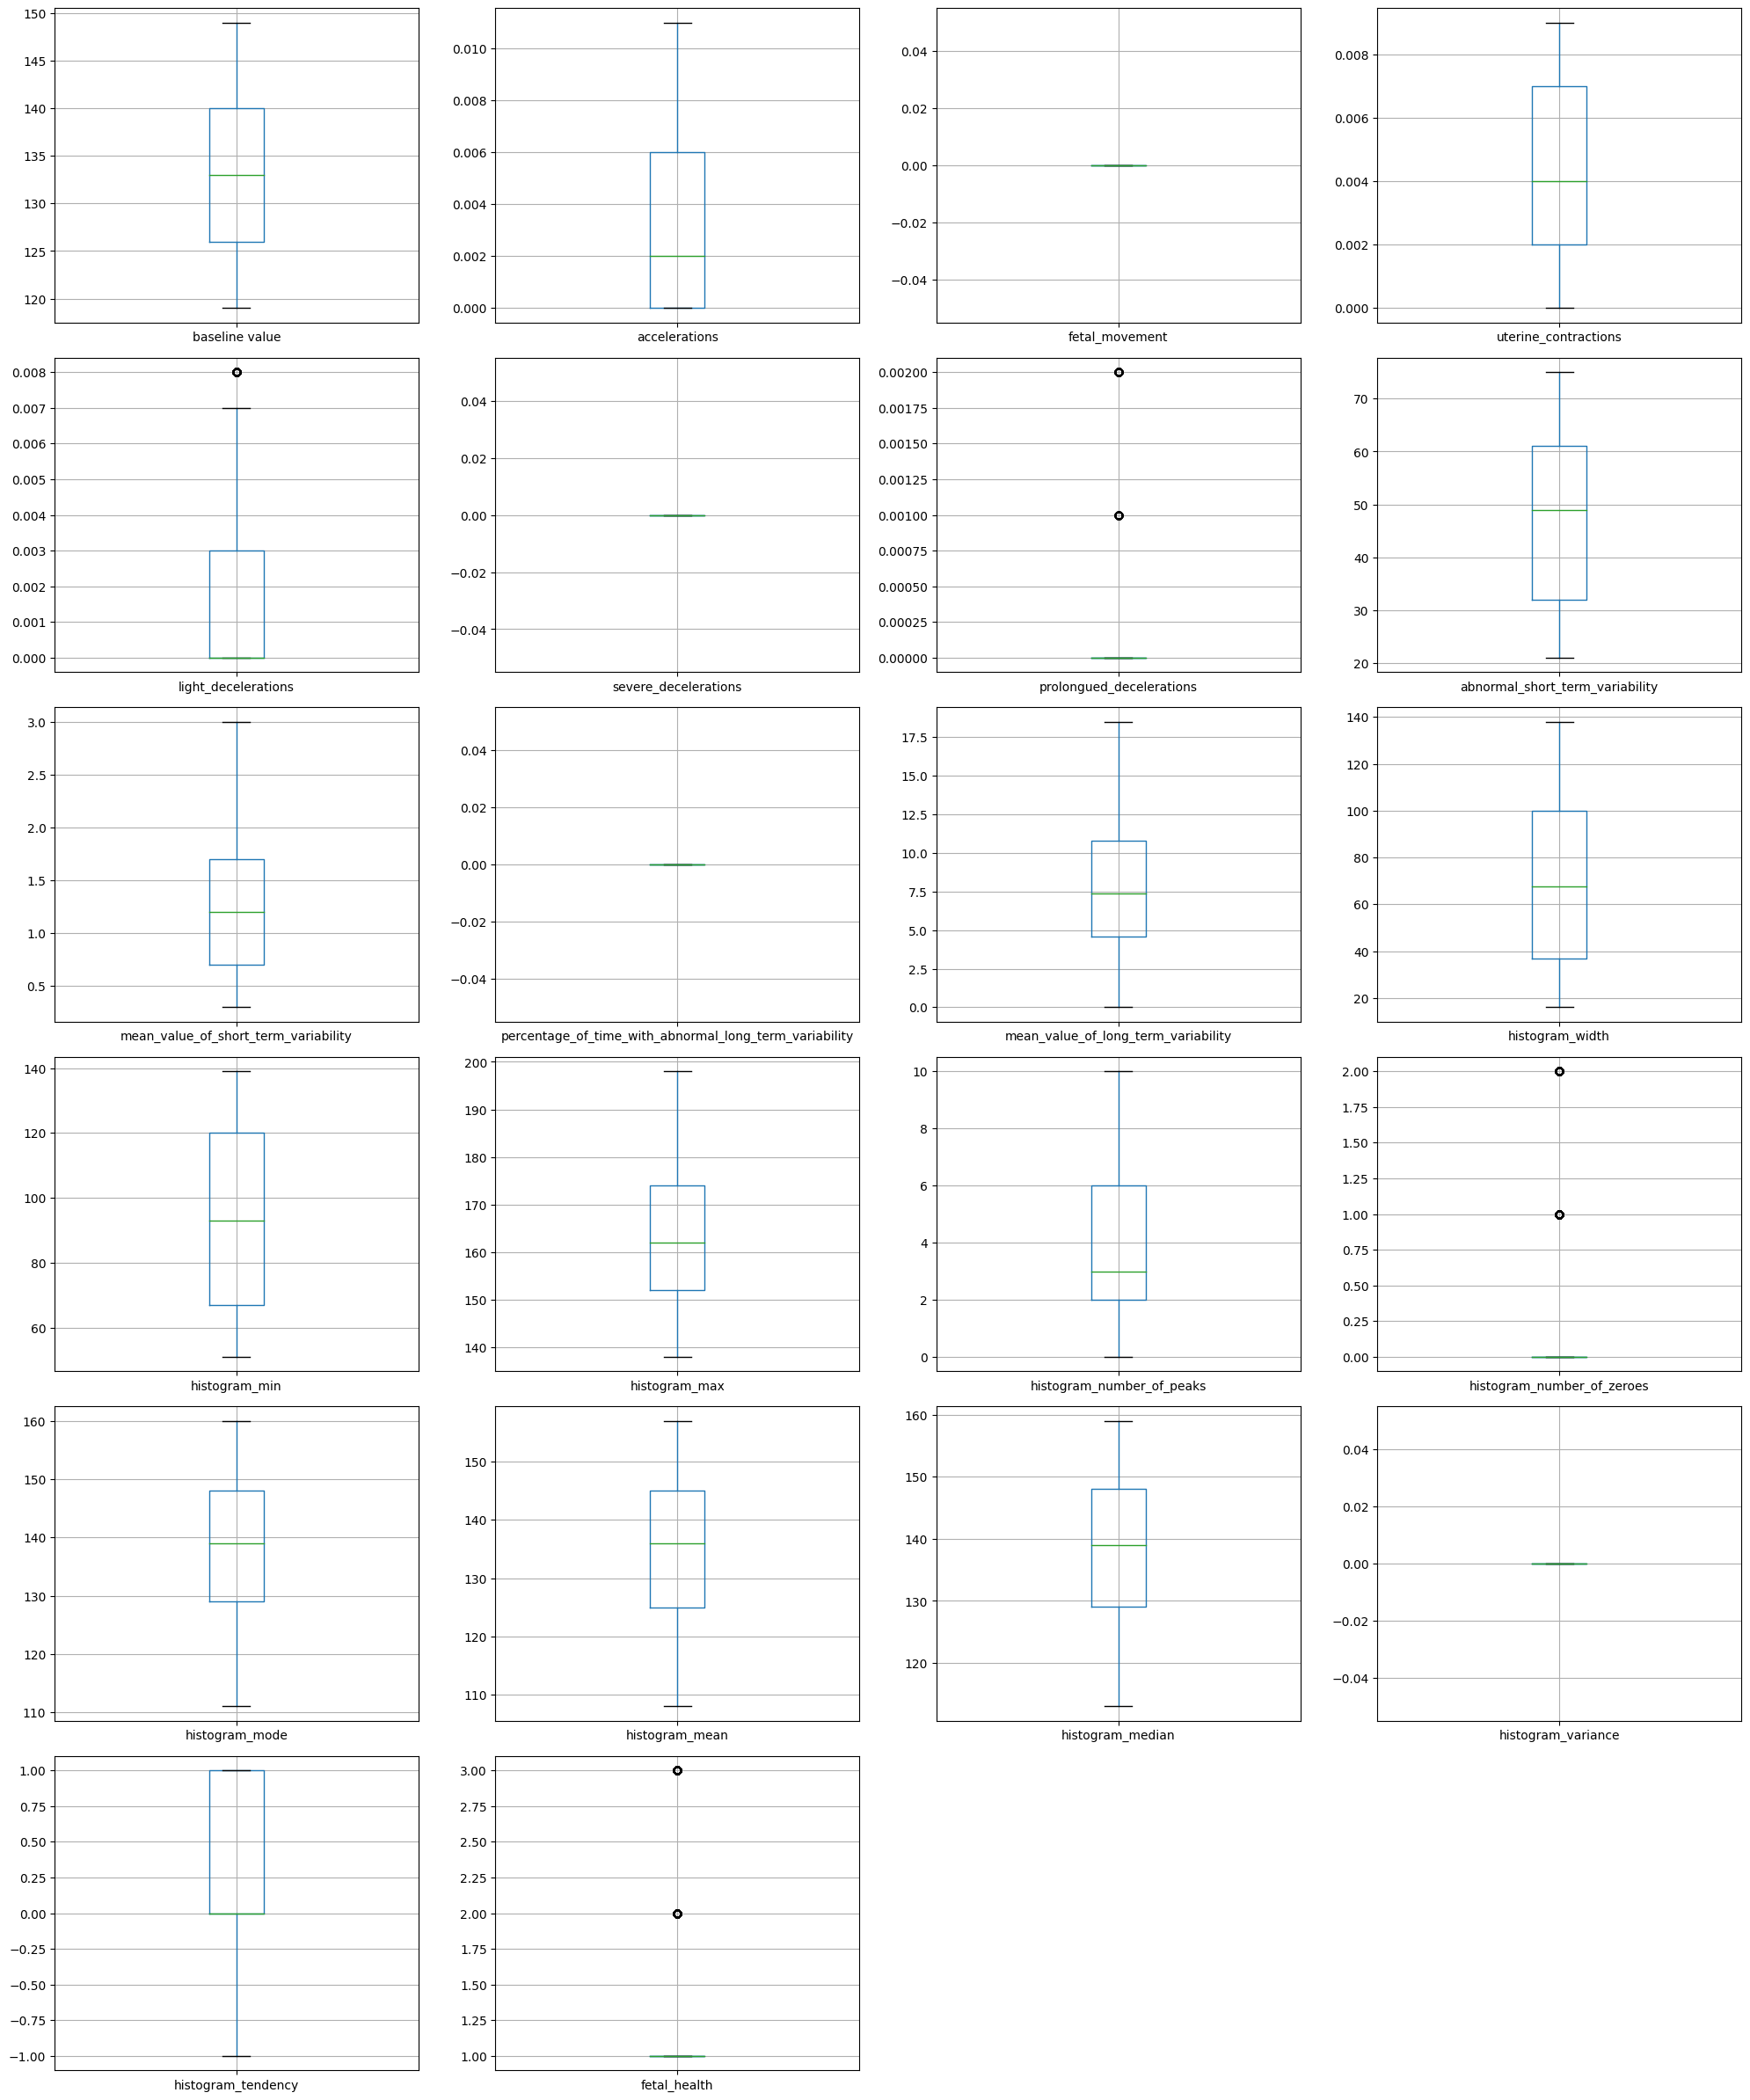

In [ ]:
box_plots()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42, test_size = 0.3)
y_train_aj = y_train - 1
y_test_aj = y_test - 1
classes = np.unique(y_train_aj)
weights = compute_class_weight(class_weight = 'balanced', classes=classes, y = y_train_aj)
class_weights = dict(zip(classes, weights))
classes
encoder = OneHotEncoder(sparse=False)
y_train_one_hot = encoder.fit_transform(y_train_aj.values.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test_aj.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(3, activation = 'softmax')

])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train_one_hot, class_weight = class_weights, epochs = 100, validation_split = 0.2)

Epoch 1/100
38/38 [==============================] - 7s 66ms/step - loss: 0.8387 - accuracy: 0.6538 - val_loss: 0.6452 - val_accuracy: 0.7685
Epoch 2/100
38/38 [==============================] - 0s 10ms/step - loss: 0.5662 - accuracy: 0.7807 - val_loss: 0.4920 - val_accuracy: 0.8087
Epoch 3/100
38/38 [==============================] - 0s 9ms/step - loss: 0.4652 - accuracy: 0.8252 - val_loss: 0.4215 - val_accuracy: 0.8523
Epoch 4/100
38/38 [==============================] - 0s 11ms/step - loss: 0.4223 - accuracy: 0.8437 - val_loss: 0.3793 - val_accuracy: 0.8523
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.3900 - accuracy: 0.8697 - val_loss: 0.3778 - val_accuracy: 0.8557
Epoch 6/100
38/38 [==============================] - 0s 7ms/step - loss: 0.3700 - accuracy: 0.8647 - val_loss: 0.3291 - val_accuracy: 0.8624
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3455 - accuracy: 0.8723 - val_loss: 0.3034 - val_accuracy: 0.8725
Epoch 8/1

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss = {loss}, accuracy = {accuracy}')

20/20 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.8887
Loss = 0.5519945025444031, accuracy = 0.8887147307395935


We are seeing overfitting, we will try to use regulatization, and keras tuner for parametrs

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units = hp.Int('units_limit',
                                 min_value = 32,
                                 max_value = 512,
                                 step = 32),
                  activation = 'relu',
                  input_shape = (X_train.shape[1],),
                  kernel_regularizer = tf.keras.regularizers.l2(hp.Float('l2_input', min_value = 1e-5, max_value = 1e-2, sampling = 'LOG'))))
  for i in range(hp.Int('n_layers', 1,3)):
    model.add(Dense(units = hp.Int(f'units_layer_{i}',
                                   min_value = 32,
                                   max_value = 512,
                                   step = 32),
                    activation = 'relu',
                    kernel_regularizer = tf.keras.regularizers.l2(hp.Float(f'l2_layer_{i}', min_value = 1e-5, max_value = 1e-2, sampling = 'LOG'))))
    model.add(Dropout(rate = hp.Float('dropout_' + str(i), min_value = 0.0, max_value = 0.5, step = 0.1)))
  model.add(Dense(3, activation = 'softmax'))
  model.compile(optimizer = Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                loss = 'categorical_crossentropy',
                metrics = 'accuracy')
  return model



In [ ]:
tuner = RandomSearch(build_model,
                     objective = 'val_accuracy',
                     max_trials = 20,
                     executions_per_trial = 2,
                     directory = 'my_dir_3',
                     project_name = 'Fetal_Health_hyper')
tuner.search(X_train, y_train_one_hot, class_weight = class_weights, epochs = 125, validation_split = 0.2)

Trial 20 Complete [00h 02m 26s]
val_accuracy: 0.9261744916439056

Best val_accuracy So Far: 0.9345637559890747
Total elapsed time: 00h 32m 15s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(X_test, y_test_one_hot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best HyperParametrs:")
print(f"Num Layers: {best_hps.get('n_layers')}")
for i in range(best_hps.get('n_layers')):
    print(f"  Units Layers {i}: {best_hps.get(f'units_layer_{i}')}")
    print(f"  L2 in layer {i}: {best_hps.get(f'l2_layer_{i}')}")
print(f"dropout: {best_hps.get('dropout_0')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")


20/20 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.8918
Test Loss: 0.4544394910335541, Test Accuracy: 0.8918495178222656
Best HyperParametrs:
Num Layers: 3
  Units Layers 0: 512
  L2 in layer 0: 3.467837089276576e-05
  Units Layers 1: 416
  L2 in layer 1: 0.0016913942789268403
  Units Layers 2: 64
  L2 in layer 2: 0.0007196851986736005
dropout: 0.2
Learning Rate: 0.001


In [ ]:
regularizer_dense_0 = l2(3.467837089276576e-05)
regularizer_dense_1 = l2(0.0016913942789268403)
regularizer_dense_2 = l2(0.0007196851986736005)

model_hp = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizer_dense_0, name='dense_layer_hp'),
    Dense(416, activation = 'relu', kernel_regularizer = regularizer_dense_1, name='dense_layer_hp_1'),
    Dense(64, activation = 'relu', kernel_regularizer = regularizer_dense_2, name='dense_layer_hp_2'),
    Dense(3, activation = 'softmax', name='dense_layer_hp_3'),
    Dropout(0.2)
])
optimizer = Adam(learning_rate = 0.001)
model_hp.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_hp.fit(X_train, y_train_one_hot, class_weight = class_weights, epochs = 100, validation_split = 0.2)

Epoch 1/100
38/38 [==============================] - 3s 30ms/step - loss: nan - accuracy: 0.6412 - val_loss: 0.9849 - val_accuracy: 0.8557
Epoch 2/100
38/38 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.6874 - val_loss: 0.8852 - val_accuracy: 0.8356
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.7286 - val_loss: 0.8078 - val_accuracy: 0.8456
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.6983 - val_loss: 0.6985 - val_accuracy: 0.8423
Epoch 5/100
38/38 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.7059 - val_loss: 0.5723 - val_accuracy: 0.8758
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.7143 - val_loss: 0.5141 - val_accuracy: 0.8758
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.7261 - val_loss: 0.4583 - val_accuracy: 0.8960
Epoch 8/100
38/38 [========

In [ ]:
loss, accuracy = model_hp.evaluate(X_test, y_test_one_hot)
print(f'Loss = {loss}, accuracy = {accuracy}')

20/20 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8903
Loss = 0.3772408664226532, accuracy = 0.890282154083252


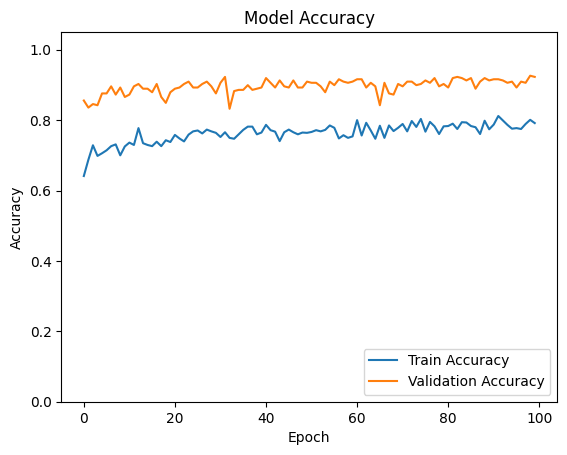

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.05])
plt.title('Model Accuracy')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = model_hp.predict(X_test)
predictions_classes = np.argmax(predictions, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

20/20 [==============================] - 0s 6ms/step


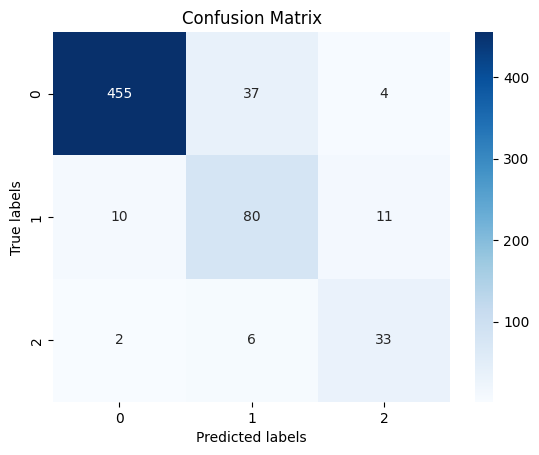

In [ ]:
cm = confusion_matrix(y_test_classes, predictions_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


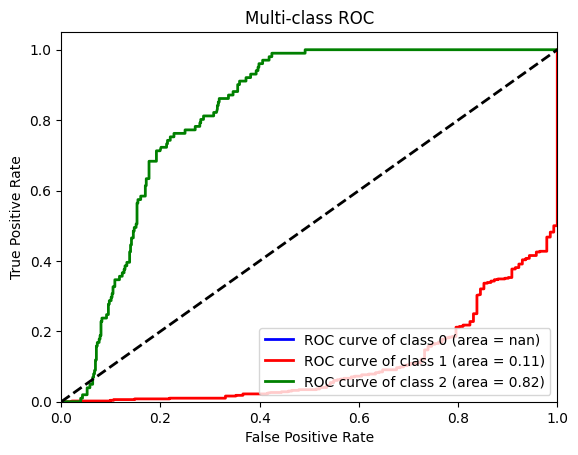

In [ ]:
y_binorize = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_binorize.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binorize[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smoteresample, y_smoteresample = smote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smoteresample, y_smoteresample, random_state = 42, test_size = 0.3)
encoder = OneHotEncoder(sparse=False)
y_train_smote_one_hot = encoder.fit_transform(y_train_smote.values.reshape(-1, 1))
y_test_smote_one_hot = encoder.transform(y_test_smote.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
def build_model_smote(hp):
  model_smote = Sequential()
  model_smote.add(Dense(units = hp.Int('units_limit',
                                 min_value = 32,
                                 max_value = 512,
                                 step = 32),
                  activation = 'relu',
                  input_shape = (X_train_smote.shape[1],),
                  kernel_regularizer = tf.keras.regularizers.l2(hp.Float('l2_input', min_value = 1e-5, max_value = 1e-2, sampling = 'LOG'))))
  for i in range(hp.Int('n_layers', 1,3)):
    model_smote.add(Dense(units = hp.Int(f'units_layer_{i}',
                                   min_value = 32,
                                   max_value = 512,
                                   step = 32),
                    activation = 'relu',
                    kernel_regularizer = tf.keras.regularizers.l2(hp.Float(f'l2_layer_{i}', min_value = 1e-5, max_value = 1e-2, sampling = 'LOG'))))
    model_smote.add(Dropout(rate = hp.Float('dropout_' + str(i), min_value = 0.0, max_value = 0.5, step = 0.1)))
  model_smote.add(Dense(3, activation = 'softmax'))
  model_smote.compile(optimizer = Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                loss = 'categorical_crossentropy',
                metrics = 'accuracy')
  return model_smote

In [ ]:
tuner_smote = RandomSearch(build_model_smote,
                     objective = 'val_accuracy',
                     max_trials = 20,
                     executions_per_trial = 2,
                     directory = 'my_dir_4',
                     project_name = 'Fetal_Health_hyper_smote')
tuner_smote.search(X_train_smote, y_train_smote_one_hot, epochs = 125, validation_split = 0.2)

Trial 20 Complete [00h 02m 48s]
val_accuracy: 0.8719424605369568

Best val_accuracy So Far: 0.9338129758834839
Total elapsed time: 00h 55m 56s


In [ ]:
best_model_smote = tuner_smote.get_best_models(num_models=1)[0]
loss, accuracy = best_model_smote.evaluate(X_test_smote, y_test_smote_one_hot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

best_hps_smote = tuner_smote.get_best_hyperparameters(num_trials=1)[0]

print("Best HyperParametrs:")
print(f"Num Layers: {best_hps_smote.get('n_layers')}")
for i in range(best_hps_smote.get('n_layers')):
    print(f"  Units Layers {i}: {best_hps_smote.get(f'units_layer_{i}')}")
    print(f"  L2 in layer {i}: {best_hps_smote.get(f'l2_layer_{i}')}")
print(f"dropout: {best_hps_smote.get('dropout_0')}")
print(f"Learning Rate: {best_hps_smote.get('learning_rate')}")


47/47 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.9114
Test Loss: 0.28370437026023865, Test Accuracy: 0.9114093780517578
Best HyperParametrs:
Num Layers: 3
  Units Layers 0: 128
  L2 in layer 0: 0.00042121984456082456
  Units Layers 1: 352
  L2 in layer 1: 0.00024407013686241177
  Units Layers 2: 160
  L2 in layer 2: 1.3299687801867667e-05
dropout: 0.1
Learning Rate: 0.0001


In [ ]:
regularizer_smote_dense_0 = l2(0.00042121984456082456)
regularizer_smote_dense_1 = l2(0.00024407013686241177)
regularizer_smote_dense_2 = l2(1.3299687801867667e-05)

model_hp_smote = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizer_smote_dense_0, name='dense_layer_hp_smote'),
    Dense(352, activation = 'relu', kernel_regularizer = regularizer_smote_dense_1, name='dense_layer_hp_1_smote'),
    Dense(160, activation = 'relu', kernel_regularizer = regularizer_smote_dense_2, name='dense_layer_hp_2_smote'),
    Dense(3, activation = 'softmax', name='dense_layer_hp_3'),
    Dropout(0.1)
])
optimizer_smote = Adam(learning_rate = 0.0001)
model_hp_smote.compile(optimizer = optimizer_smote, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_smote = model_hp_smote.fit(X_train_smote, y_train_smote_one_hot, epochs = 125, validation_split = 0.2)

Epoch 1/125
87/87 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.6155 - val_loss: 0.6513 - val_accuracy: 0.7770
Epoch 2/125
87/87 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7007 - val_loss: 0.5863 - val_accuracy: 0.7669
Epoch 3/125
87/87 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.7115 - val_loss: 0.7286 - val_accuracy: 0.7468
Epoch 4/125
87/87 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.7295 - val_loss: 0.5195 - val_accuracy: 0.8187
Epoch 5/125
87/87 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.7302 - val_loss: 0.5246 - val_accuracy: 0.8144
Epoch 6/125
87/87 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7327 - val_loss: 0.4886 - val_accuracy: 0.8043
Epoch 7/125
87/87 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.7396 - val_loss: 0.4858 - val_accuracy: 0.7957
Epoch 8/125
87/87 [=============

In [ ]:
loss, accuracy = model_hp_smote.evaluate(X_test_smote, y_test_smote_one_hot)
print(f'Loss = {loss}, accuracy = {accuracy}')

47/47 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8852
Loss = 0.32427725195884705, accuracy = 0.8852348923683167


In [ ]:
predictions_smote = model_hp_smote.predict(X_test_smote)
predictions_classes_smote = np.argmax(predictions_smote, axis=1)
y_test_smote_classes = np.argmax(y_test_smote_one_hot, axis=1)

NameError: name 'model_hp_smote' is not defined

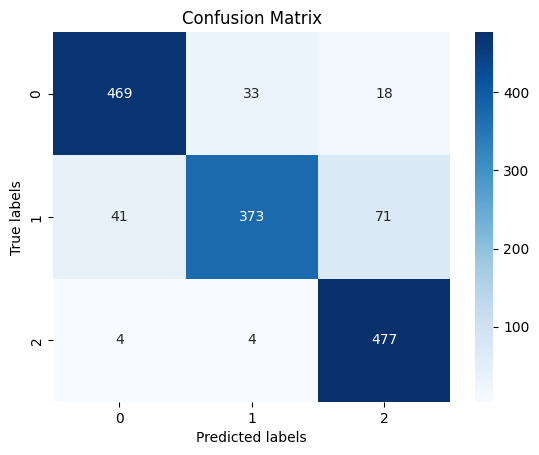

In [ ]:
cm = confusion_matrix(y_test_smote_classes, predictions_classes_smote)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

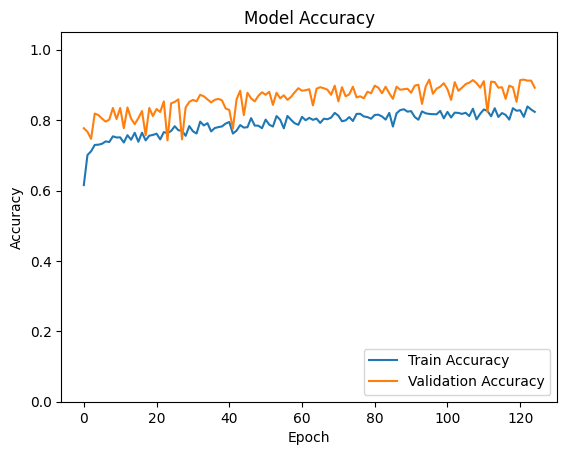

In [ ]:
plt.plot(history_smote.history['accuracy'], label='Train Accuracy')
plt.plot(history_smote.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.05])
plt.title('Model Accuracy')
plt.legend(loc="lower right")
plt.show()